### **[图像增广](https://www.bilibili.com/video/BV17y4y1g76q/?share_source=copy_web&vd_source=a7ae9163cb2cd121bfd86ea1f4ecd2ef&t=1)**

**大型数据集是成功应用深度神经网络的先决条件**。
图像增广在对训练图像进行一系列的随机变化之后，**生成相似但不同的训练样本，从而扩大了训练集的规模**。
此外，应用图像增广的原因是，**随机改变训练样本可以减少模型对某些属性的依赖，从而提高模型的泛化能力**。
例如，我们可以以不同的方式裁剪图像，使感兴趣的对象出现在不同的位置，减少模型对于对象出现位置的依赖。
我们还可以调整亮度、颜色等因素来降低模型对颜色的敏感度。

### **CES上的真实故事**
- 有一家做只能售货机的公司，发现他们的演示机器在现场效果很差，因为现场
  - 不同的色温
  - 桌面的灯光反射不一样
- 他们连夜现场收集了数据，训练了一个新的模型，同时买了一块新桌布

### **[数据增强](https://www.bilibili.com/video/BV17y4y1g76q/?share_source=copy_web&vd_source=a7ae9163cb2cd121bfd86ea1f4ecd2ef&t=276)**
- 增加一个已有数据集，**使得有更多的多样性**
  - 在语言里面加入各种不同的背景噪音
  - 改变图片的颜色和形状

### **[使用增强数据训练](https://www.bilibili.com/video/BV17y4y1g76q/?share_source=copy_web&vd_source=a7ae9163cb2cd121bfd86ea1f4ecd2ef&t=339)**
- 只作用在训练的时候，**可以被认为是一种正则项**

### **[翻转](https://www.bilibili.com/video/BV17y4y1g76q/?share_source=copy_web&vd_source=a7ae9163cb2cd121bfd86ea1f4ecd2ef&t=407)**
- **左右翻转图像通常不会改变对象的类别。这是最早且最广泛使用**的图像增广方法之一
- **上下翻转图像不如左右图像翻转那样常用**，因为上下翻转并不总是可行

### **[切割](https://www.bilibili.com/video/BV17y4y1g76q/?share_source=copy_web&vd_source=a7ae9163cb2cd121bfd86ea1f4ecd2ef&t=454)**
- 从图片中切割一块，**然后变形到固定形状**
  - 随机高宽比（e.g. [3/4, 4/3]）
  - 随机大小（e.g. [8%, 100%]）
  - 随机位置

### **[颜色](https://www.bilibili.com/video/BV17y4y1g76q/?share_source=copy_web&vd_source=a7ae9163cb2cd121bfd86ea1f4ecd2ef&t=578)**
- 改变色调，饱和度，明亮度（e.g. [0.5, 1.5]）

### **[几十种其他的办法](https://www.bilibili.com/video/BV17y4y1g76q/?share_source=copy_web&vd_source=a7ae9163cb2cd121bfd86ea1f4ecd2ef&t=640)**
[imgaug](https://github.com/aleju/imgaug)

### **总结**
- 数据增广通过变形数据来**获取多样性而使得模型泛化性能更好**
- 常见图片增广包括**翻转、切割、变色**

-----------------------------------------------------
### **图像增广**

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

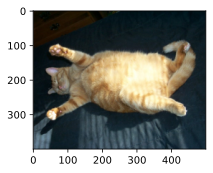

In [2]:
d2l.set_figsize()
img = d2l.Image.open('img/cat1.jpg')
d2l.plt.imshow(img);

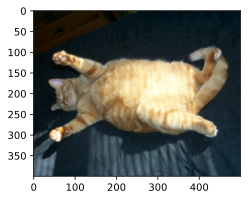

In [3]:
# 不调用 `d2l` 中定义的函数来读取数据集

import matplotlib.pyplot as plt
from PIL import Image

# 设置图形的尺寸
plt.figure(figsize=(4, 3))

# 加载图像
img = Image.open('img/cat1.jpg')

# 显示图像
plt.imshow(img)
plt.show()


大多数图像增广方法都具有一定的随机性。为了便于观察图像增广的效果，我们下面定义辅助函数`apply`。
此函数在输入图像`img`上多次运行图像增广方法`aug`并显示所有结果。

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

In [ ]:
# 不调用 `d2l`
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    # 创建一个图形窗口
    plt.figure(figsize=(num_cols*scale, num_rows*scale))
    
    for i in range(num_rows * num_cols):
        # 生成经过数据增强处理的图像
        augmented_img = aug(img)
        
        # 将图像添加到子图中
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(np.asarray(augmented_img))
        plt.axis('off')  # 可选：关闭坐标轴

    # 显示图形窗口
    plt.show()

# 示例数据增强函数（需要自定义）
def augment_function(img):
    # 在这里定义你的数据增强操作
    # 例如，可以进行随机裁剪、旋转、翻转等操作
    # 这里假设 augment_function 是一个将图像稍微缩放的示例
    return img.resize((int(img.width * 1.2), int(img.height * 1.2)))

# 加载原始图像
original_img = Image.open('img/cat1.jpg')

# 调用 apply 函数进行数据增强和可视化
apply(original_img, augment_function)


**左右翻转图像**

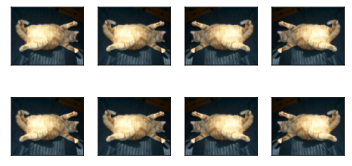

In [5]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

**上下翻转图像**

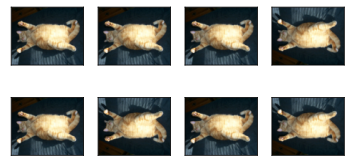

In [6]:
apply(img, torchvision.transforms.RandomVerticalFlip())

下面的代码将[**随机裁剪**]一个面积为原始面积10%到100%的区域，该区域的宽高比从0.5～2之间随机取值。
然后，区域的宽度和高度都被缩放到200像素。
在本节中（除非另有说明），$a$和$b$之间的随机数指的是在区间$[a, b]$中通过**均匀采样**获得的连续值。


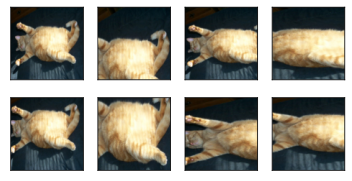

In [7]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

- 另一种增广方法是**改变颜色**
    - 我们可以改变图像颜色的四个方面：**亮度、对比度、饱和度和色调**。


在下面的示例中，我们[**随机更改图像的亮度**]，随机值为原始图像的50%（$1-0.5$）到150%（$1+0.5$）之间。

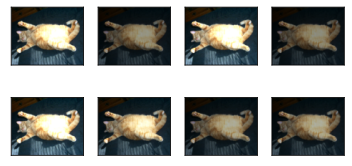

In [8]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

**随机更改图像的色调**

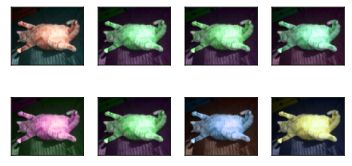

In [9]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

还可以**创建一个`RandomColorJitter`实例**，并设置如何同时[**随机更改图像的亮度（`brightness`）、对比度（`contrast`）、饱和度（`saturation`）和色调（`hue`）**]。


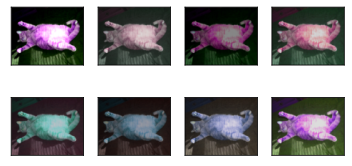

In [10]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

**结合多种图像增广方法**

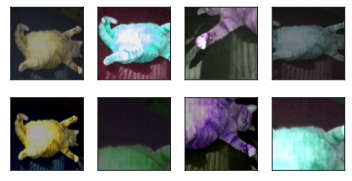

In [11]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

**使用图像增广进行训练**

这里，我们使用CIFAR-10数据集，而不是我们之前使用的Fashion-MNIST数据集。
这是因为Fashion-MNIST数据集中对象的位置和大小已被规范化，而CIFAR-10数据集中对象的颜色和大小差异更明显。
CIFAR-10数据集中的前32个训练图像如下所示。


Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ../data/cifar-10-python.tar.gz


100.0%


Extracting ../data/cifar-10-python.tar.gz to ../data


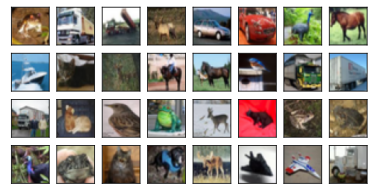

In [12]:
all_images = torchvision.datasets.CIFAR10(train=True, root="../data",
                                          download=True)
d2l.show_images([all_images[i][0] for i in range(32)], 4, 8, scale=0.8);

为了在预测过程中得到确切的结果，我们通常对训练样本只进行图像增广，且在预测过程中不使用随机操作的图像增广。
在这里，我们[**只使用最简单的随机左右翻转**]。
此外，我们使用`ToTensor`实例将一批图像转换为深度学习框架所要求的格式，即形状为（批量大小，通道数，高度，宽度）的32位浮点数，取值范围为0～1。


In [ ]:
train_augs = torchvision.transforms.Compose([
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor()])